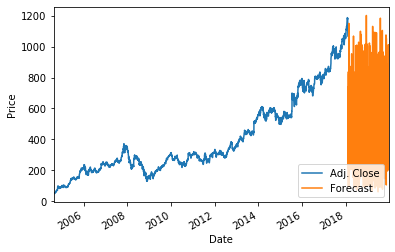

In [17]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_test)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [13]:
print(confidence)

0.9765783021799289


In [6]:
!pip install scikit-learn

In [4]:
!pip list

Package              Version            
-------------------- -------------------
absl-py              0.9.0              
astor                0.8.1              
attrs                19.3.0             
backcall             0.1.0              
bleach               3.1.0              
certifi              2019.11.28         
cffi                 1.13.2             
chardet              3.0.4              
colorama             0.4.3              
cycler               0.10.0             
decorator            4.4.1              
defusedxml           0.6.0              
entrypoints          0.3                
gast                 0.3.2              
grpcio               1.26.0             
h5py                 2.10.0             
idna                 2.8                
imageio              2.6.1              
importlib-metadata   1.3.0              
include              0.2.2              
inflection           0.3.1              
ipykernel            5.1.3              
ipython         